In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [4]:
A = np.zeros((128, 128, 128, 210))
B = A.reshape(-1, 210)
B.shape

(2097152, 210)

In [2]:
rootDir = '/d/DATD/datd/popeye_PRF/sub-MAM0606/ses-pRF/func_smoothed/'
filePrefix = 'sub-MAM0606_ses-pRF_task-TASK_run-'
# fileSuffixLeft = '_hemi-L_space-fsnative_mtsmooth-3mm_bold.func.gii'
# fileSuffixRight = '_hemi-R_space-fsnative_mtsmooth-3mm_bold.func.gii'
fileSuffixLeft = '_hemi-L_space-fsnative_smoothed_bold.func.gii'
fileSuffixRight = '_hemi-R_space-fsnative_smoothed_bold.func.gii'
nRuns = 10

In [2]:
fname = '/d/DATD/datd/popeye_pRF/sub-MAM0606/popeyeFit/fitEstimates/RF_ss5_gFit_popeye_right.func.gii'
fname_save =  '/d/DATD/datd/popeye_pRF/sub-MAM0606/popeyeFit/fitEstimates/RF_ss5_gFit_popeye_right_fixed.func.gii'
img = nib.load(fname)
dataT = img.darrays#[0].data

In [9]:
dataT[0].data.shape

(223109,)

In [4]:
# fname = '/System/Volumes/Data/d/DATD/datd/pRF_orig/GH/RF1/GH_RF1_vista/lh.RF_ss5-fFit.func.gii'
fname = '/d/DATD/datd/popeye_pRF/sub-MAM0606/popeyeFit/fitEstimates/RF_ss5_gFit_popeye_right.func.gii'
fname_save =  '/d/DATD/datd/popeye_pRF/sub-MAM0606/popeyeFit/fitEstimates/RF_ss5_gFit_popeye_right_fixed.func.gii'
img = nib.load(fname)
dataT = img.darrays#[0].data

# imgNew = nib.gifti.GiftiImage(meta=img.meta)
metaFake = {'AnatomicalStructurePrimary': 'CortexRight', 
        'PaletteNormalizationMode': 'NORMALIZATION_SELECTED_MAP_DATA', 
        'TimeStep': '1.3', 
        }

giiMeta = nib.gifti.GiftiMetaData( metaFake )
imgNew = nib.gifti.GiftiImage(meta=giiMeta)

for i in range(0, len(dataT)):
    dataNew = nib.gifti.GiftiDataArray(dataT[i].data)
    imgNew.add_gifti_data_array(dataNew)
# dataNew = nib.gifti.GiftiDataArray(dataT)
# imgNew.add_gifti_data_array(dataNew)
nib.save(imgNew, fname_save)


In [30]:
type(dataT[0].data)

numpy.ndarray

In [24]:
# Save data back to a new GIFTI file

# imgNew = nib.gifti.GiftiImage(meta=img.meta)
metaFake = {'AnatomicalStructurePrimary': 'CortexLeft', 
        'PaletteNormalizationMode': 'NORMALIZATION_SELECTED_MAP_DATA', 
        'TimeStep': '1.3', 
        }

giiMeta = nib.gifti.GiftiMetaData( metaFake )
imgNew = nib.gifti.GiftiImage(meta=giiMeta)

for i in range(0, len(dataT)):
    dataNew = nib.gifti.GiftiDataArray(dataT[i].data)
    imgNew.add_gifti_data_array(dataNew)
# dataNew = nib.gifti.GiftiDataArray(dataT)
# imgNew.add_gifti_data_array(dataNew)
nib.save(imgNew, 'test.func.gii')

In [23]:
imgNew.meta

<GiftiMetaData {'AnatomicalStructurePrimary': 'CortexLeft', 'PaletteNormalizationMode': 'NORMALIZATION_SELECTED_MAP_DATA', 'TimeStep': '1.3'}>

In [7]:
for run in range(1, nRuns+1):
    fName = rootDir + '/' + filePrefix + str(run).zfill(2) + fileSuffixLeft
    
    img = nib.load(fName)
    img_temp = np.array([x.data for x in img.darrays])
    img_temp = np.expand_dims(img_temp, axis=-1)
    if run == 1:
        img_data = img_temp
    else:
        img_data = np.concatenate((img_data, img_temp), axis=-1)

img_data = np.mean(img_data, axis=-1)

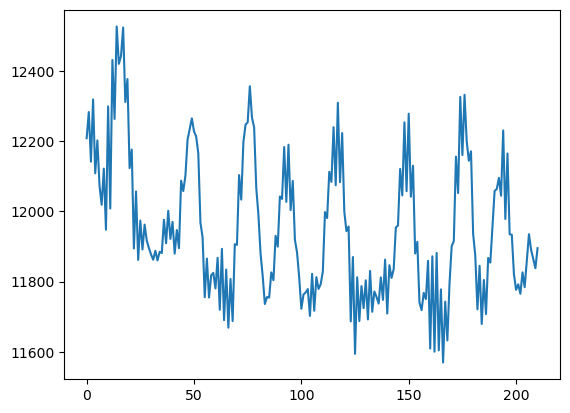

In [4]:
plt.figure()
plt.plot(img_data[:, 0])
plt.show()

In [5]:
img_data.shape

(211, 223109)

In [8]:
metaFake = {'AnatomicalStructurePrimary': 'CortexLeft', 
        'PaletteNormalizationMode': 'NORMALIZATION_SELECTED_MAP_DATA', 
        'TimeStep': '1.3', 
        }
giiMeta = nib.gifti.GiftiMetaData( metaFake )
gii_img = nib.gifti.GiftiImage(meta=giiMeta)

for i in range(0, img_data.shape[0]):
    dataNew = nib.gifti.GiftiDataArray(img_data[i])
    gii_img.add_gifti_data_array(dataNew)

outputFile = 'MAM_lh_avg.func.gii'
nib.save(gii_img, outputFile)

In [46]:
[x.data for x in img.darrays]

[array([11974.398 , 11675.727 , 11230.086 , ..., 12301.978 , 12391.415 ,
         4745.0854], dtype=float32),
 array([12073.777 , 11772.87  , 11364.425 , ..., 12230.712 , 12147.199 ,
         4636.6016], dtype=float32),
 array([11731.827 , 11468.851 , 11008.625 , ..., 12389.751 , 12320.589 ,
         4783.7764], dtype=float32),
 array([11894.231 , 11579.411 , 11104.349 , ..., 12240.671 , 12345.61  ,
         4750.8716], dtype=float32),
 array([12105.47  , 11704.383 , 11200.175 , ..., 12367.988 , 12263.581 ,
         4808.7056], dtype=float32),
 array([11594.577, 11379.388, 10891.581, ..., 12457.527, 12317.628,
         4719.511], dtype=float32),
 array([11695.802 , 11467.017 , 11010.953 , ..., 12338.099 , 12124.864 ,
         4759.7847], dtype=float32),
 array([11953.965, 11566.403, 11062.782, ..., 12371.359, 12068.392,
         4768.021], dtype=float32),
 array([11869.126 , 11597.21  , 11100.583 , ..., 12241.891 , 12095.59  ,
         4686.2036], dtype=float32),
 array([11850.142 , 11

In [47]:
img.darrays

[<GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time series[210821]>,
 <GiftiDataArray time ser

In [45]:
img_data.shape

(211, 210821)

In [34]:
len(img_data)

211

In [39]:
int(float(img.darrays[0].metadata['TimeStep']))

1300

In [40]:
img_data.shape

(211, 210821)

In [7]:
# Find tr_length
for da in img.darrays:
    print(da.intent, da.data.shape, da.metadata)

11 (210821,) {'Name': '#1, smooth 1.27398', 'PaletteColorMapping': '<PaletteColorMapping Version="1">\n   <ScaleMode>MODE_AUTO_SCALE_ABSOLUTE_PERCENTAGE</ScaleMode>\n   <AutoScalePercentageValues>98.000000 2.000000 2.000000 98.000000</AutoScalePercentageValues>\n   <AutoScaleAbsolutePercentageValues>2.000000 98.000000</AutoScaleAbsolutePercentageValues>\n   <UserScaleValues>-100.000000 0.000000 0.000000 100.000000</UserScaleValues>\n   <PaletteName>ROY-BIG-BL</PaletteName>\n   <InterpolatePalette>true</InterpolatePalette>\n   <InvertPalette>OFF</InvertPalette>\n   <DisplayPositiveData>true</DisplayPositiveData>\n   <DisplayZeroData>false</DisplayZeroData>\n   <DisplayNegativeData>true</DisplayNegativeData>\n   <ThresholdTest>THRESHOLD_TEST_SHOW_OUTSIDE</ThresholdTest>\n   <ThresholdType>THRESHOLD_TYPE_OFF</ThresholdType>\n   <ThresholdFailureInGreen>false</ThresholdFailureInGreen>\n   <ThresholdNormalValues>-1.000000 1.000000</ThresholdNormalValues>\n   <ThresholdMappedValues>-1.000000

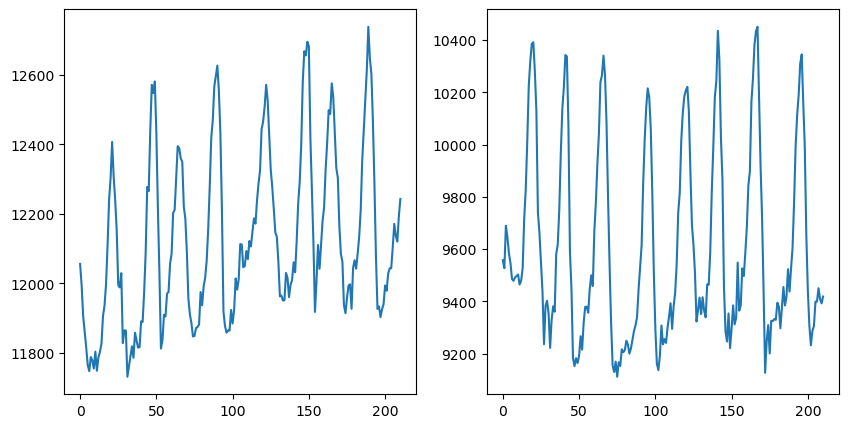

In [4]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(img_data[:, 0])
axs[1].plot(img_data[:, 20000])
plt.show()